#### 동별 인구 현황 분석
- https://jumin.mois.go.kr/ageStatMonth.do#none
- 2025년 1월 기준

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 한글설정
# plt.rcParams["font.family"] = "Malgun Gothic"
# - 설정
# plt.rcParams["axes.unicode_minus"] = False
import koreanize_matplotlib

import warnings
warnings.simplefilter(action="ignore")

ModuleNotFoundError: No module named 'distutils'

#### 데이터 로드

In [5]:
# encoding = utf-8
# window 가 사용하는 인코딩 ms949 or cp949

df = pd.read_csv("./resources/동별인구현황.csv", encoding="cp949",thousands=",")
df.head()

,행정구역,2025년01월_계_총인구수,2025년01월_계_연령구간인구수,2025년01월_계_0~9세,2025년01월_계_10~19세,2025년01월_계_20~29세,2025년01월_계_30~39세,2025년01월_계_40~49세,2025년01월_계_50~59세,2025년01월_계_60~69세,2025년01월_계_70~79세,2025년01월_계_80~89세,2025년01월_계_90~99세,2025년01월_계_100세 이상
0,서울특별시 (1100000000),9330658,9330658,481444,720200,1302814,1442331,1382564,1487739,1324900,779744,357147,50292,1483
1,서울특별시 종로구 (1111000000),138208,138208,5466,9347,20902,19684,18481,23358,20980,11969,6862,1117,42
2,서울특별시 종로구 청운효자동(1111051500),11040,11040,541,1015,1311,1512,1780,1900,1416,904,564,93,4
3,서울특별시 종로구 사직동(1111053000),8939,8939,411,623,1028,1432,1389,1450,1268,712,515,104,7
4,서울특별시 종로구 삼청동(1111054000),2214,2214,83,152,239,279,309,337,377,256,152,30,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3911 entries, 0 to 3910
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   행정구역                3911 non-null   object
 1   2025년01월_계_총인구수     3911 non-null   int64 
 2   2025년01월_계_연령구간인구수  3911 non-null   int64 
 3   2025년01월_계_0~9세     3911 non-null   int64 
 4   2025년01월_계_10~19세   3911 non-null   int64 
 5   2025년01월_계_20~29세   3911 non-null   int64 
 6   2025년01월_계_30~39세   3911 non-null   int64 
 7   2025년01월_계_40~49세   3911 non-null   int64 
 8   2025년01월_계_50~59세   3911 non-null   int64 
 9   2025년01월_계_60~69세   3911 non-null   int64 
 10  2025년01월_계_70~79세   3911 non-null   int64 
 11  2025년01월_계_80~89세   3911 non-null   int64 
 12  2025년01월_계_90~99세   3911 non-null   int64 
 13  2025년01월_계_100세 이상  3911 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 427.9+ KB


In [7]:
df.shape

(3911, 14)

In [8]:
df.describe()

,2025년01월_계_총인구수,2025년01월_계_연령구간인구수,2025년01월_계_0~9세,2025년01월_계_10~19세,2025년01월_계_20~29세,2025년01월_계_30~39세,2025년01월_계_40~49세,2025년01월_계_50~59세,2025년01월_계_60~69세,2025년01월_계_70~79세,2025년01월_계_80~89세,2025년01월_계_90~99세,2025년01월_계_100세 이상
count,3.911000e+03,3.911000e+03,3911.000000,3.911000e+03,3.911000e+03,3.911000e+03,3.911000e+03,3.911000e+03,3.911000e+03,3911.000000,3911.000000,3911.000000,3911.000000
mean,4.179789e+04,4.179789e+04,2552.655842,3.783690e+03,4.858761e+03,5.418731e+03,6.302578e+03,7.130624e+03,6.362745e+03,3410.958578,1700.249808,269.958834,6.941959
std,3.029207e+05,3.029207e+05,19090.876619,2.758884e+04,3.705363e+04,4.228384e+04,4.713944e+04,5.132981e+04,4.395824e+04,23086.349508,11196.318371,1749.855862,46.897821
min,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,3.501000e+03,3.501000e+03,78.000000,1.550000e+02,2.070000e+02,2.025000e+02,2.990000e+02,5.790000e+02,8.270000e+02,550.500000,332.000000,56.000000,1.000000
50%,1.202600e+04,1.202600e+04,533.000000,8.520000e+02,1.291000e+03,1.375000e+03,1.611000e+03,2.020000e+03,1.962000e+03,1067.000000,532.000000,86.000000,2.000000
75%,2.416200e+04,2.416200e+04,1398.500000,2.134500e+03,2.863500e+03,3.174500e+03,3.625500e+03,4.175000e+03,3.527000e+03,1806.000000,844.500000,130.000000,4.000000
max,1.369965e+07,1.369965e+07,934589.000000,1.319355e+06,1.622395e+06,1.905438e+06,2.211706e+06,2.362742e+06,1.914333e+06,913722.000000,442244.000000,71178.000000,1945.000000


In [9]:
df.columns

Index(['행정구역', '2025년01월_계_총인구수', '2025년01월_계_연령구간인구수', '2025년01월_계_0~9세',
       '2025년01월_계_10~19세', '2025년01월_계_20~29세', '2025년01월_계_30~39세',
       '2025년01월_계_40~49세', '2025년01월_계_50~59세', '2025년01월_계_60~69세',
       '2025년01월_계_70~79세', '2025년01월_계_80~89세', '2025년01월_계_90~99세',
       '2025년01월_계_100세 이상'],
      dtype='object')

In [11]:
# 필요없는 컬럼 제거
# drop(columns=["제거할 컬럼명 나열"],inplace=True)

df.drop(columns=['2025년01월_계_총인구수', '2025년01월_계_연령구간인구수'],inplace=True)

In [ ]:
df.columns.str.replace("2025년01월_계_","")

In [13]:
# 컬럼명 변경
# 2025년01월_계_ 제거

df.columns = df.columns.str.replace("2025년01월_계_","")
df.columns

Index(['행정구역', '0~9세', '10~19세', '20~29세', '30~39세', '40~49세', '50~59세',
       '60~69세', '70~79세', '80~89세', '90~99세', '100세 이상'],
      dtype='object')

In [19]:
# 종로구 평창동 인구 수 시각화

# 종로구 평창동 찾기
# df.head(2)

# df[df["행정구역"] == "서울특별시 종로구 평창동(1111056000)"]

pyedong_df = df[df["행정구역"].str.contains("평창동")]
pyedong_df

,행정구역,0~9세,10~19세,20~29세,30~39세,40~49세,50~59세,60~69세,70~79세,80~89세,90~99세,100세 이상
6,서울특별시 종로구 평창동(1111056000),935,1501,1908,2032,2395,3097,2832,1500,830,190,12


In [20]:
# pyedong_df 행정구역 컬럼 제거

pyedong_df.drop(columns=["행정구역"],inplace=True)

In [22]:
# 행, 열 변경 : T or transpose()
pyedong_df = pyedong_df.T
pyedong_df

,6
0~9세,935
10~19세,1501
20~29세,1908
30~39세,2032
40~49세,2395
50~59세,3097
60~69세,2832
70~79세,1500
80~89세,830
90~99세,190


In [23]:
# 컬럼명 변경 6 => 인구수

pyedong_df.columns = ["인구수"]
pyedong_df

,인구수
0~9세,935
10~19세,1501
20~29세,1908
30~39세,2032
40~49세,2395
50~59세,3097
60~69세,2832
70~79세,1500
80~89세,830
90~99세,190


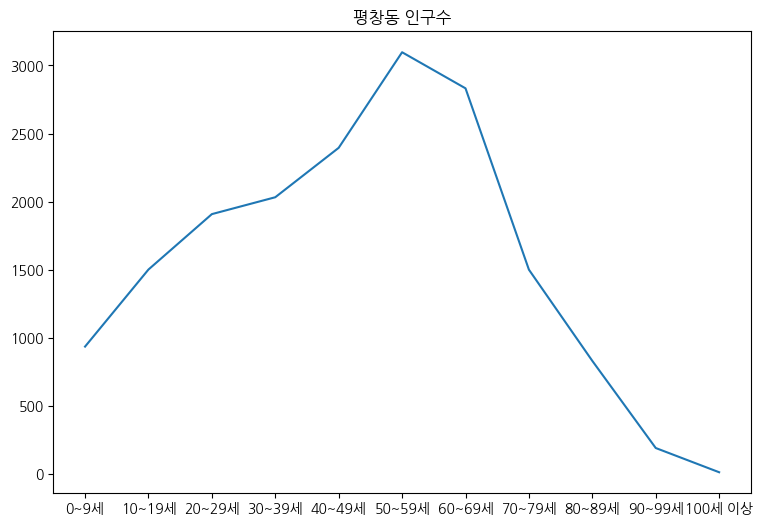

In [25]:
# 선차트
plt.figure(figsize=(9,6))
plt.plot(pyedong_df["인구수"])
g = plt.title("평창동 인구수")

In [27]:
pyedong_df.index

Index(['0~9세', '10~19세', '20~29세', '30~39세', '40~49세', '50~59세', '60~69세',
       '70~79세', '80~89세', '90~99세', '100세 이상'],
      dtype='object')

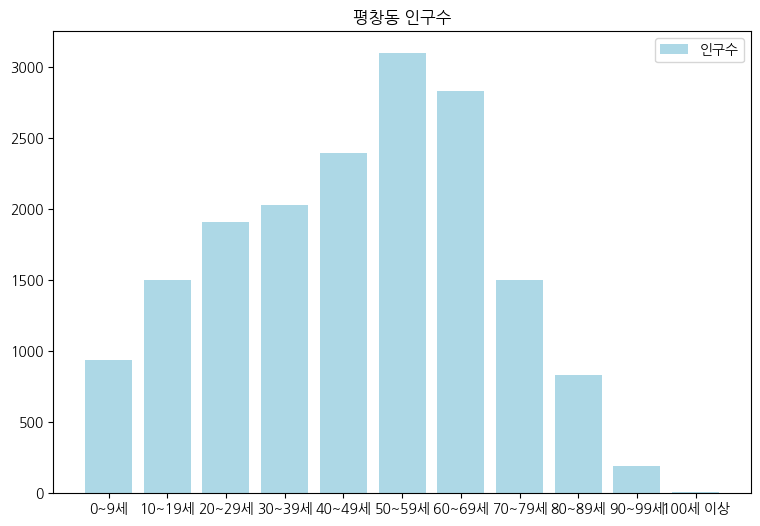

In [29]:
plt.figure(figsize=(9,6))
plt.bar(pyedong_df.index,pyedong_df["인구수"],color="lightblue")
plt.legend(["인구수"])
g = plt.title("평창동 인구수")

In [32]:
# 사용자로부터 특정 동네를 입력받아 처리

dong = input("인구현황에 대해 알고 싶은 지역의 이름(읍면동 단위)을 입력해 주세요")
dong

'종로구 사직동'

In [34]:
# 입력받은 동네의 행정구역 찾기 / drop / T / 시각화

search_df = df[df["행정구역"].str.contains(dong)]
search_df.set_index("행정구역",inplace=True)

In [37]:
search_df = search_df.T
search_df

행정구역,서울특별시 종로구 사직동(1111053000)
0~9세,411
10~19세,623
20~29세,1028
30~39세,1432
40~49세,1389
50~59세,1450
60~69세,1268
70~79세,712
80~89세,515
90~99세,104


In [39]:
search_df.columns = ["인구수"]

In [40]:
search_df

,인구수
0~9세,411
10~19세,623
20~29세,1028
30~39세,1432
40~49세,1389
50~59세,1450
60~69세,1268
70~79세,712
80~89세,515
90~99세,104


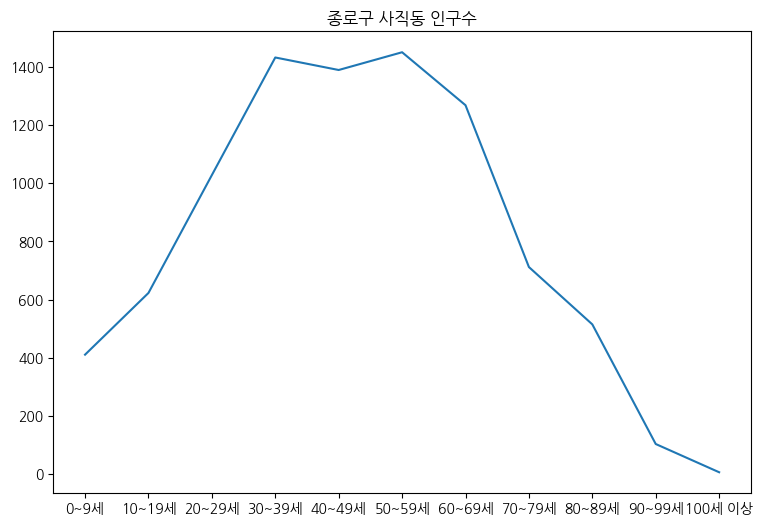

In [41]:
# matplotlib

plt.figure(figsize=(9,6))
plt.plot(search_df["인구수"])
g = plt.title(dong+" 인구수")

<Axes: >

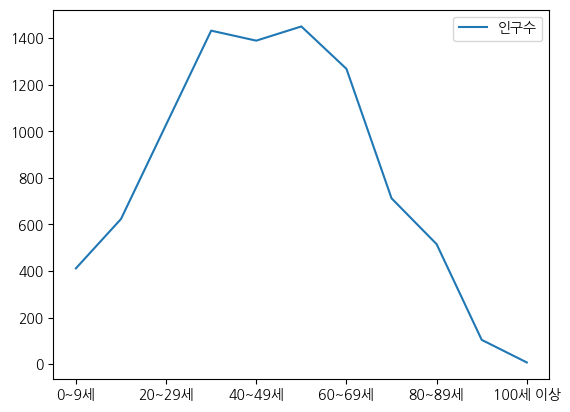

In [42]:
# pandas 차트

search_df.plot()

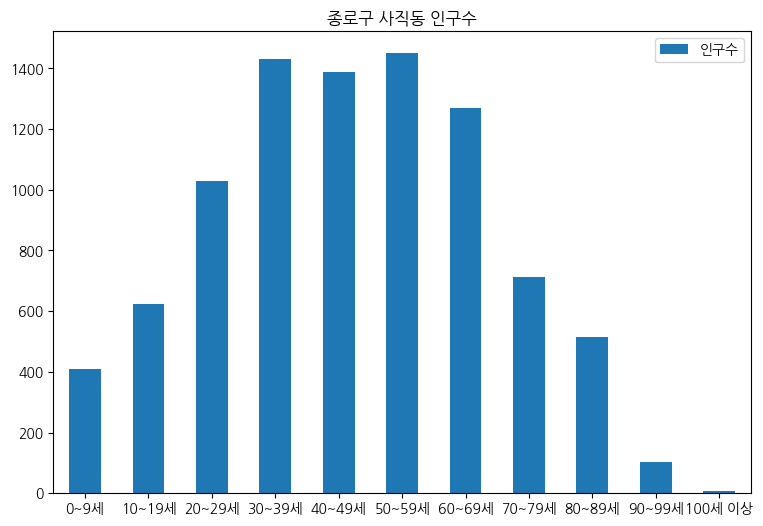

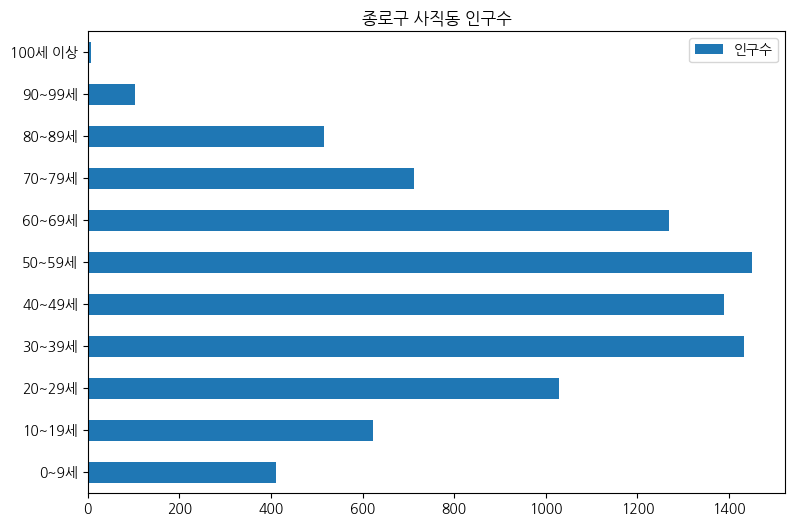

In [46]:
search_df.plot(kind="bar",title=dong+" 인구수",figsize=(9,6),rot=0);
search_df.plot(kind="barh",title=dong+" 인구수",figsize=(9,6),rot=0);

In [47]:
search_df

,인구수
0~9세,411
10~19세,623
20~29세,1028
30~39세,1432
40~49세,1389
50~59세,1450
60~69세,1268
70~79세,712
80~89세,515
90~99세,104


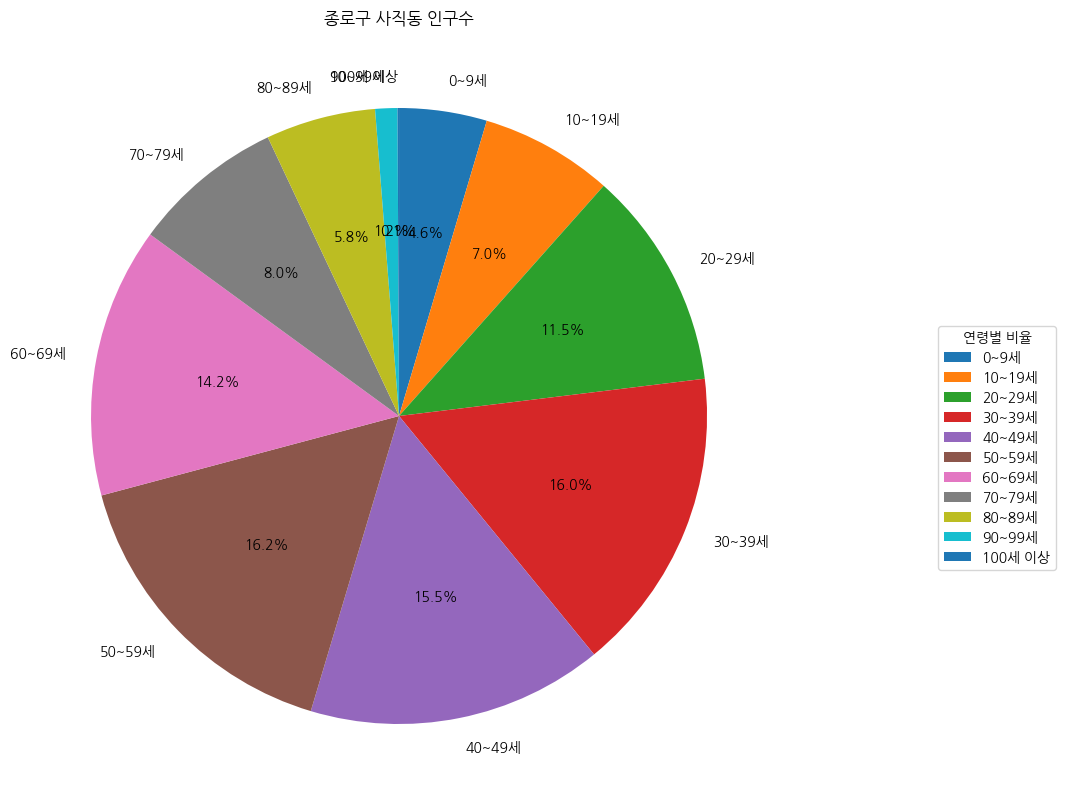

In [50]:
plt.figure(figsize=(15,10))
plt.pie(search_df["인구수"], labels=search_df.index, startangle=90, counterclock=False, autopct="%.1f%%")
g = plt.title(dong+" 인구수")
plt.legend(title="연령별 비율",loc=(1.2,0.3));

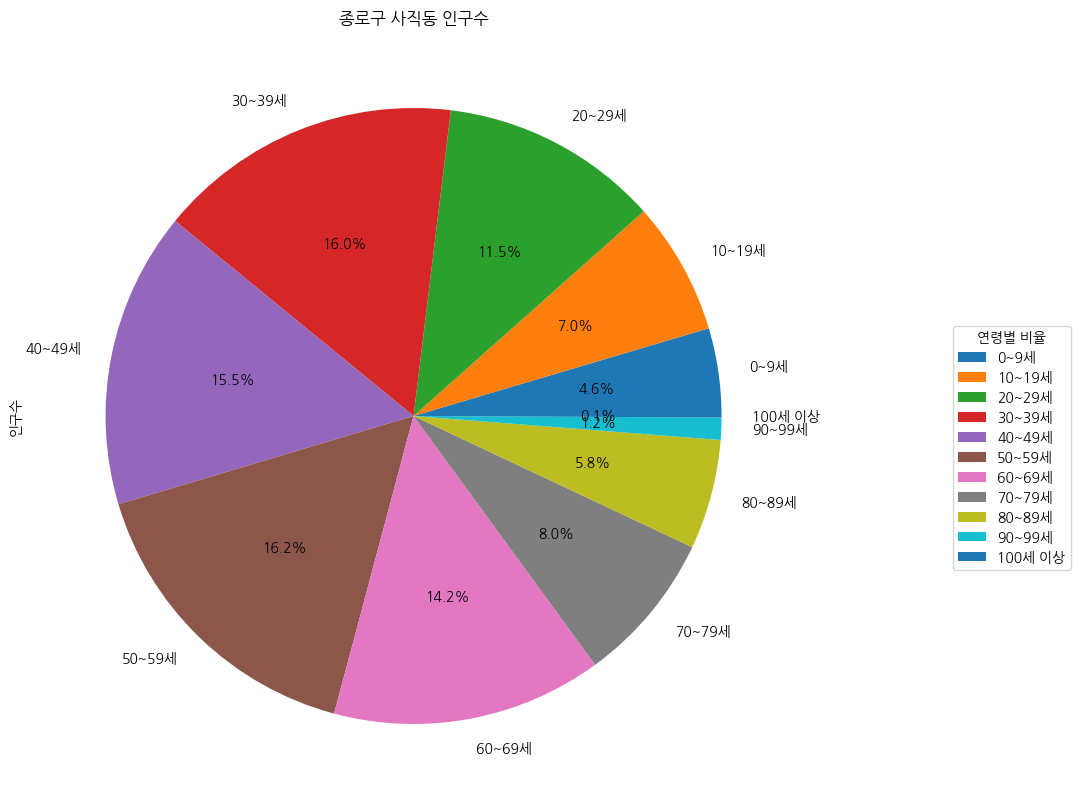

In [53]:
search_df.plot(y="인구수",kind="pie",title=dong+" 인구수",figsize=(15,10),autopct="%.1f%%");
plt.legend(title="연령별 비율",loc=(1.2,0.3));